In [33]:
import matplotlib.pyplot as plt
import numpy as np

from math import sqrt


def putpixel(data, x, y, color, alpha=1.0):
    #print(x, y)
    x = int(x)
    y = int(y)
    bg = data [y][x]
    if(alpha>1.0):
        alpha=1.
    color2 = [0.0, 0.0 ,0.0 ]
    color2[0] = alpha * color[0] + (1.0 - alpha) *bg[0]
    color2[1] = alpha * color[1] + (1.0 - alpha) *bg[1]
    color2[2] = alpha * color[2] + (1.0 - alpha) *bg[2]
    data[y, x] = color2


In [34]:
def lineAntiAliasing(x1, y1, x2, y2):
    RGB = np.zeros((200, 200, 3), dtype = np.uint8)
    RGB.fill(255)
    A = y2-y1
    B = x1-x2
    C = x1*y2-x2*y1
    Z = sqrt(A * A + B * B)
    for x in range(min(x1, x2) - 1, max(x1, x2) + 2):
        for y in range(min(y1, y2) - 1, max(y1, y2) + 2):
            d = abs(A * x + B * y + C) / Z
            if d<1:
                RGB [y, x] = 255 * d
                #putpixel(RGB, x, y, color, (1 - d))
    return RGB

In [35]:
def lineAntiAliasingColor(x1, y1, x2, y2, color):
    RGB = np.zeros((200, 200, 3), dtype = np.uint8)
    RGB.fill(255)
    A = y2-y1
    B = x1-x2
    C = x1*y2-x2*y1
    Z = sqrt(A * A + B * B)
    for x in range(min(x1, x2) - 1, max(x1, x2) + 2):
        for y in range(min(y1, y2) - 1, max(y1, y2) + 2):
            d = abs(A * x + B * y + C) / Z
            if d<1:
                #RGB [y, x] = 255 * d
                putpixel(RGB, x, y, color, (1 - d))
    return RGB

In [36]:
def lineS(x1, y1, x2, y2):
    RGB = np.zeros((200, 200, 3), dtype=np.uint8)
    RGB.fill(255)
    if (x1 == x2 and y1 == y2):
        RGB[x1, y1] = 0
        return RGB
    if abs(x2 - x1) > abs(y2 - x1):
        if x2 < x1:
            x1, x2 = x2, x1
            y1, y2 = y2, y1
        a = (y2 - y1)/(x2-x1)
        for x in range(x1, x2+1):
            y = y1 + a*(x-x1)
            RGB[int(y), x] = 0
    else:   
        if y2 < y1:
            x1, x2 = x2, x1
            y1, y2 = y2, y1
        a = (x2 - x1)/(y2-y1)
        for y in range(y1, y2+1):
            x = x1 + a*(y-y1)
            RGB[y, int(x)] = 0
    return RGB


In [56]:
def lineXW(x1, y1, x2, y2, data,color):
    def _fpart(x):
        return x - int(x)
 
    def _rfpart(x):
        return 1.0 - _fpart(x)
   
    
    def _round(x):
        return int(np.floor(x+0.5))

    dx = x2 - x1
    dy = y2 - y1
    
    steep = abs(dx) < abs(dy)
    if(steep):
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    
    if( x2 < x1):
        x1,x2 = x2,x1
        y1,y2 = y2,y1
    dx = x2 - x1
    dy = y2 - y1
    
    gradient = dy/dx
    
    xend = round(x1)
    yend = y1 + gradient * (xend - x1)
    
    xgap = _fpart(x1 + 0.5)
    xpxl1 = xend
    ypxl1 = np.floor(yend)
    
    if(steep):
        putpixel(data, ypxl1, xpxl1,color, _rfpart(yend) * xgap)
        putpixel(data, ypxl1 + 1, xpxl1, color, _fpart(yend) * xgap)
    else:
        putpixel(data, xpxl1,ypxl1, color, _rfpart(yend) * xgap)
        putpixel(data, xpxl1,ypxl1 + 1, color, _fpart(yend) * xgap)
    
    intery = yend + gradient
    xend = np.round(x2)
    yend = y2 + gradient * (xend - x2)
    xgap = _fpart(x2 + 0.5)
    xpxl2 = xend
    ypxl2 = np.floor(yend)
    
    if(steep):
        putpixel(data, ypxl2, xpxl2, color, _rfpart(yend) * xgap)
        putpixel(data, ypxl2+1, xpxl2, color, _fpart(yend) * xgap)
    else:
        putpixel(data, xpxl2, ypxl2, color, _rfpart(yend) * xgap)
        putpixel(data, xpxl2, ypxl2 + 1, color, _fpart(yend) * xgap)
                 
    if(steep):
        for x in range(xpxl1 + 1, xpxl2):
            putpixel(data, np.floor(intery), x, color, _rfpart(intery))
            putpixel(data, np.floor(intery) + 1, x, color, _fpart(intery))
            intery = intery + gradient
    else:
        for x in range(xpxl1 + 1, xpxl2):
            putpixel(data, x, np.floor(intery), color, _rfpart(intery))
            putpixel(data, x, np.floor(intery) + 1, color, _fpart(intery))
            intery = intery + gradient
    return data

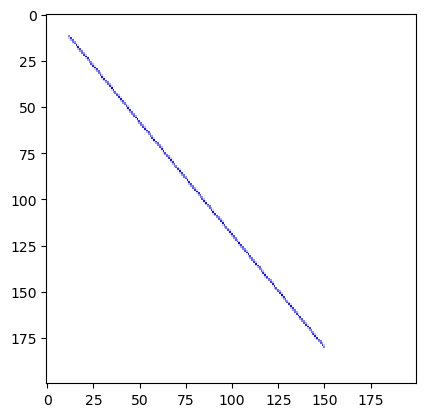

In [67]:
data = np.zeros((200, 200, 3), dtype=np.uint8)
data.fill(255)
color = [0,0,255]
data = lineXW(12,12,150,180,data,color)
plt.imshow(data, interpolation='none')

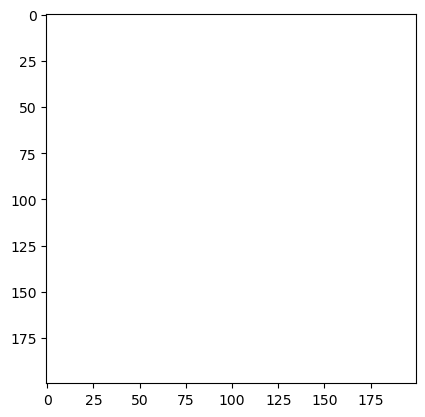

In [58]:
data1=lineAntiAliasing(12, 12, 190, 10)
plt.imshow(data1, interpolation='none')

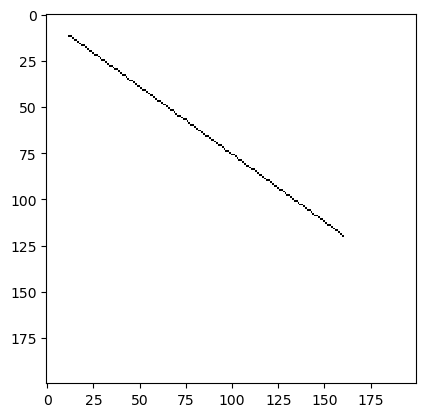

In [8]:
data2=lineS(12, 12, 160, 120)
plt.imshow(data2, interpolation='none')

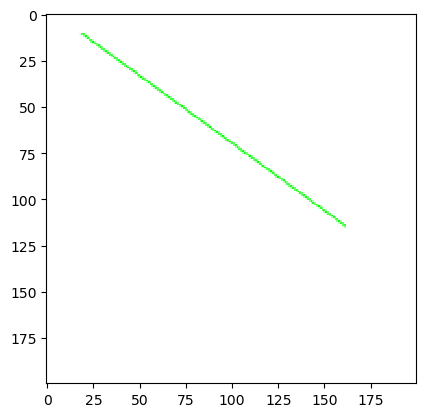

In [10]:
data3=lineAntiAliasingColor(12, 12, 160, 120,[0,255,0])
plt.imshow(data3, interpolation='none')